# Import Necessaries libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
df = pd.read_excel('bank_credit_train.xlsx')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [3]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: x/10 if x>900 else x)

# Summary of data

In [4]:
df.describe()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.000000,1.000000e+05,80846.000000,8.084600e+04,95778.000000,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,0.773610,1.176045e+07,716.293447,1.378277e+06,5.977594,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,0.418496,3.178394e+07,28.297164,1.081360e+06,3.501109,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,0.000000,1.080200e+04,585.000000,7.662700e+04,1.000000,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,1.796520e+05,703.000000,8.488440e+05,3.000000,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,1.000000,3.122460e+05,722.000000,1.174162e+06,6.000000,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,1.000000,5.249420e+05,738.000000,1.650663e+06,10.000000,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000,1.000000e+08,751.000000,1.655574e+08,10.000000,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  int64  
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   float64
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [6]:
df.shape

(100000, 19)

# Looking at Unique values in data

In [7]:
df_dup = df[df.duplicated()]
df_dup.shape

(10215, 19)

In [8]:
df.drop(df_dup.index, inplace=True)

<AxesSubplot:>

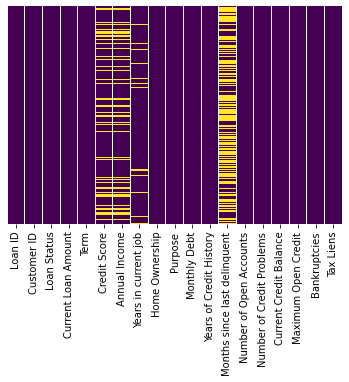

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


# Looking for Null Values

In [10]:
df.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             3802
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48337
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      190
Tax Liens                           9
dtype: int64


# Filling the Nan Values

In [11]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].mean())
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].mean())
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(df['Months since last delinquent'].median())
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].mode()[0])

<AxesSubplot:>

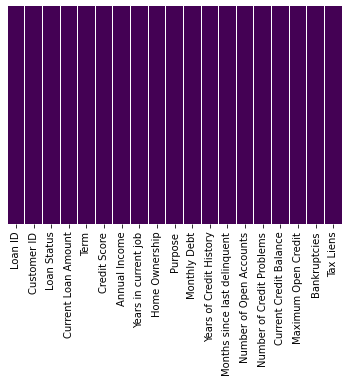

In [12]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

# Univariate Analysis

In [13]:
df['Loan Status'].value_counts(normalize=True)

1    0.747853
0    0.252147
Name: Loan Status, dtype: float64

<AxesSubplot:>

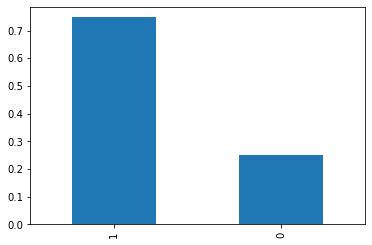

In [14]:
df['Loan Status'].value_counts(normalize=True).plot.bar()

Around 77% of applications were approved

# Univariate Analysis for categorical features

<AxesSubplot:title={'center':'Purpose'}>

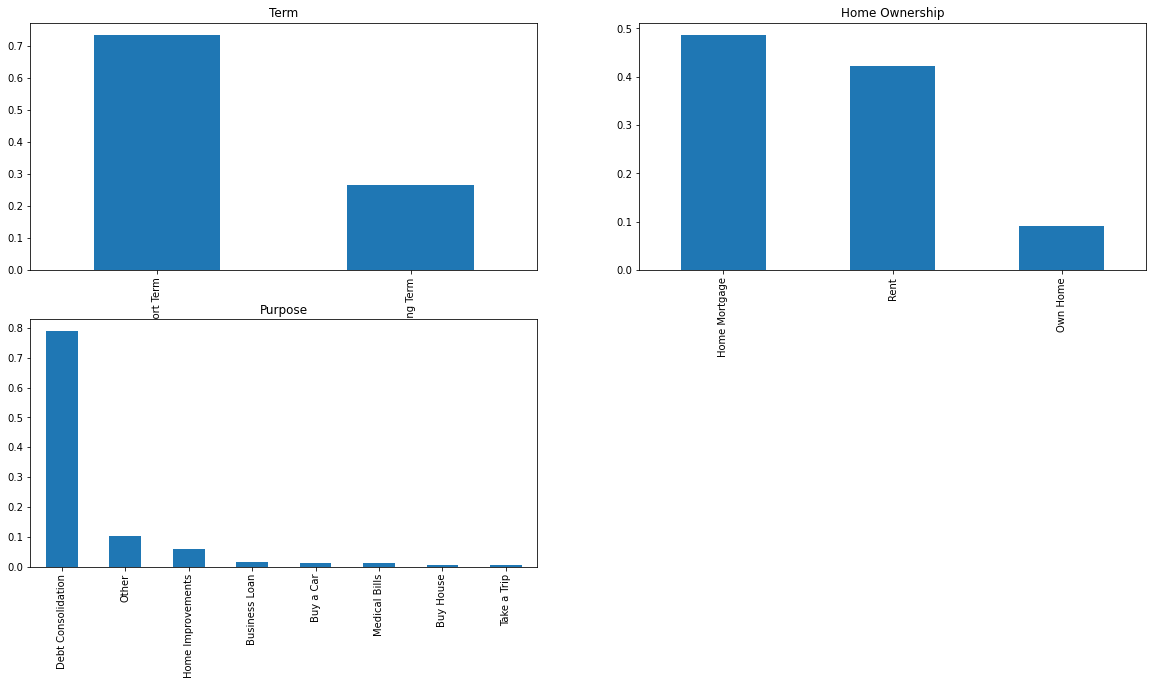

In [15]:
#visualizing the categorical features

plt.subplot(221)
df['Term'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Term')


plt.subplot(222)
df['Home Ownership'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Home Ownership')


plt.subplot(223)
df['Purpose'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Purpose')

1. Around 77% of loan applicant for long term/time
2. Around 58% of loan for Home Mortgage 

<AxesSubplot:title={'center':'Purpose For Loan'}>

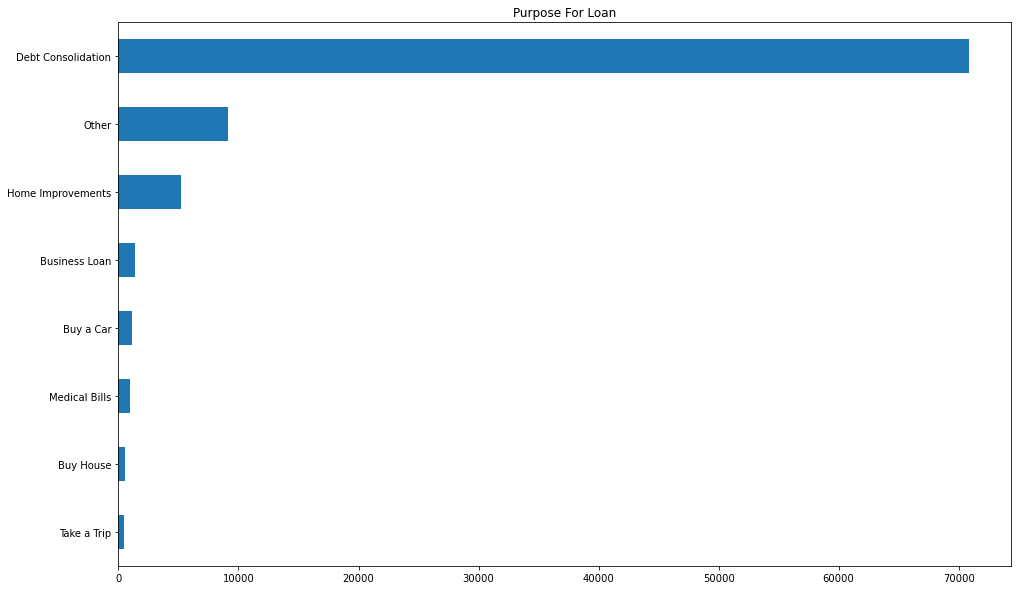

In [16]:
df['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh',title='Purpose For Loan', figsize=(16,10))

# Visualizing Data with histrogram,Boxplot and Pairplot

array([[<AxesSubplot:title={'center':'Loan Status'}>,
        <AxesSubplot:title={'center':'Current Loan Amount'}>,
        <AxesSubplot:title={'center':'Credit Score'}>,
        <AxesSubplot:title={'center':'Annual Income'}>],
       [<AxesSubplot:title={'center':'Years in current job'}>,
        <AxesSubplot:title={'center':'Monthly Debt'}>,
        <AxesSubplot:title={'center':'Years of Credit History'}>,
        <AxesSubplot:title={'center':'Months since last delinquent'}>],
       [<AxesSubplot:title={'center':'Number of Open Accounts'}>,
        <AxesSubplot:title={'center':'Number of Credit Problems'}>,
        <AxesSubplot:title={'center':'Current Credit Balance'}>,
        <AxesSubplot:title={'center':'Maximum Open Credit'}>],
       [<AxesSubplot:title={'center':'Bankruptcies'}>,
        <AxesSubplot:title={'center':'Tax Liens'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

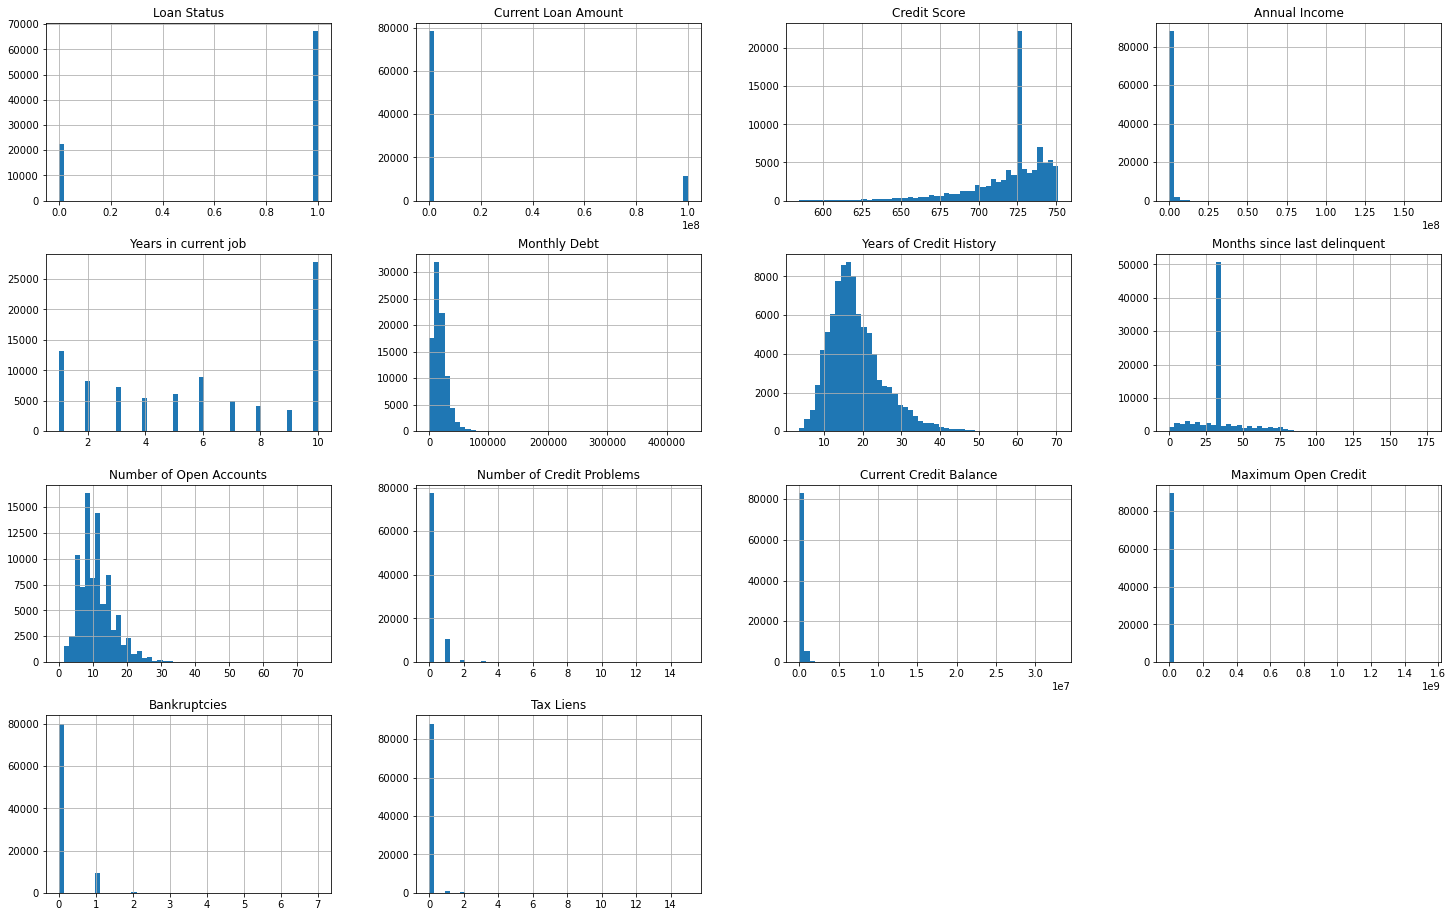

In [17]:
df.hist(bins=50,figsize=(25,16))

In [18]:
X = df[['Loan Status','Current Loan Amount','Years in current job','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']]

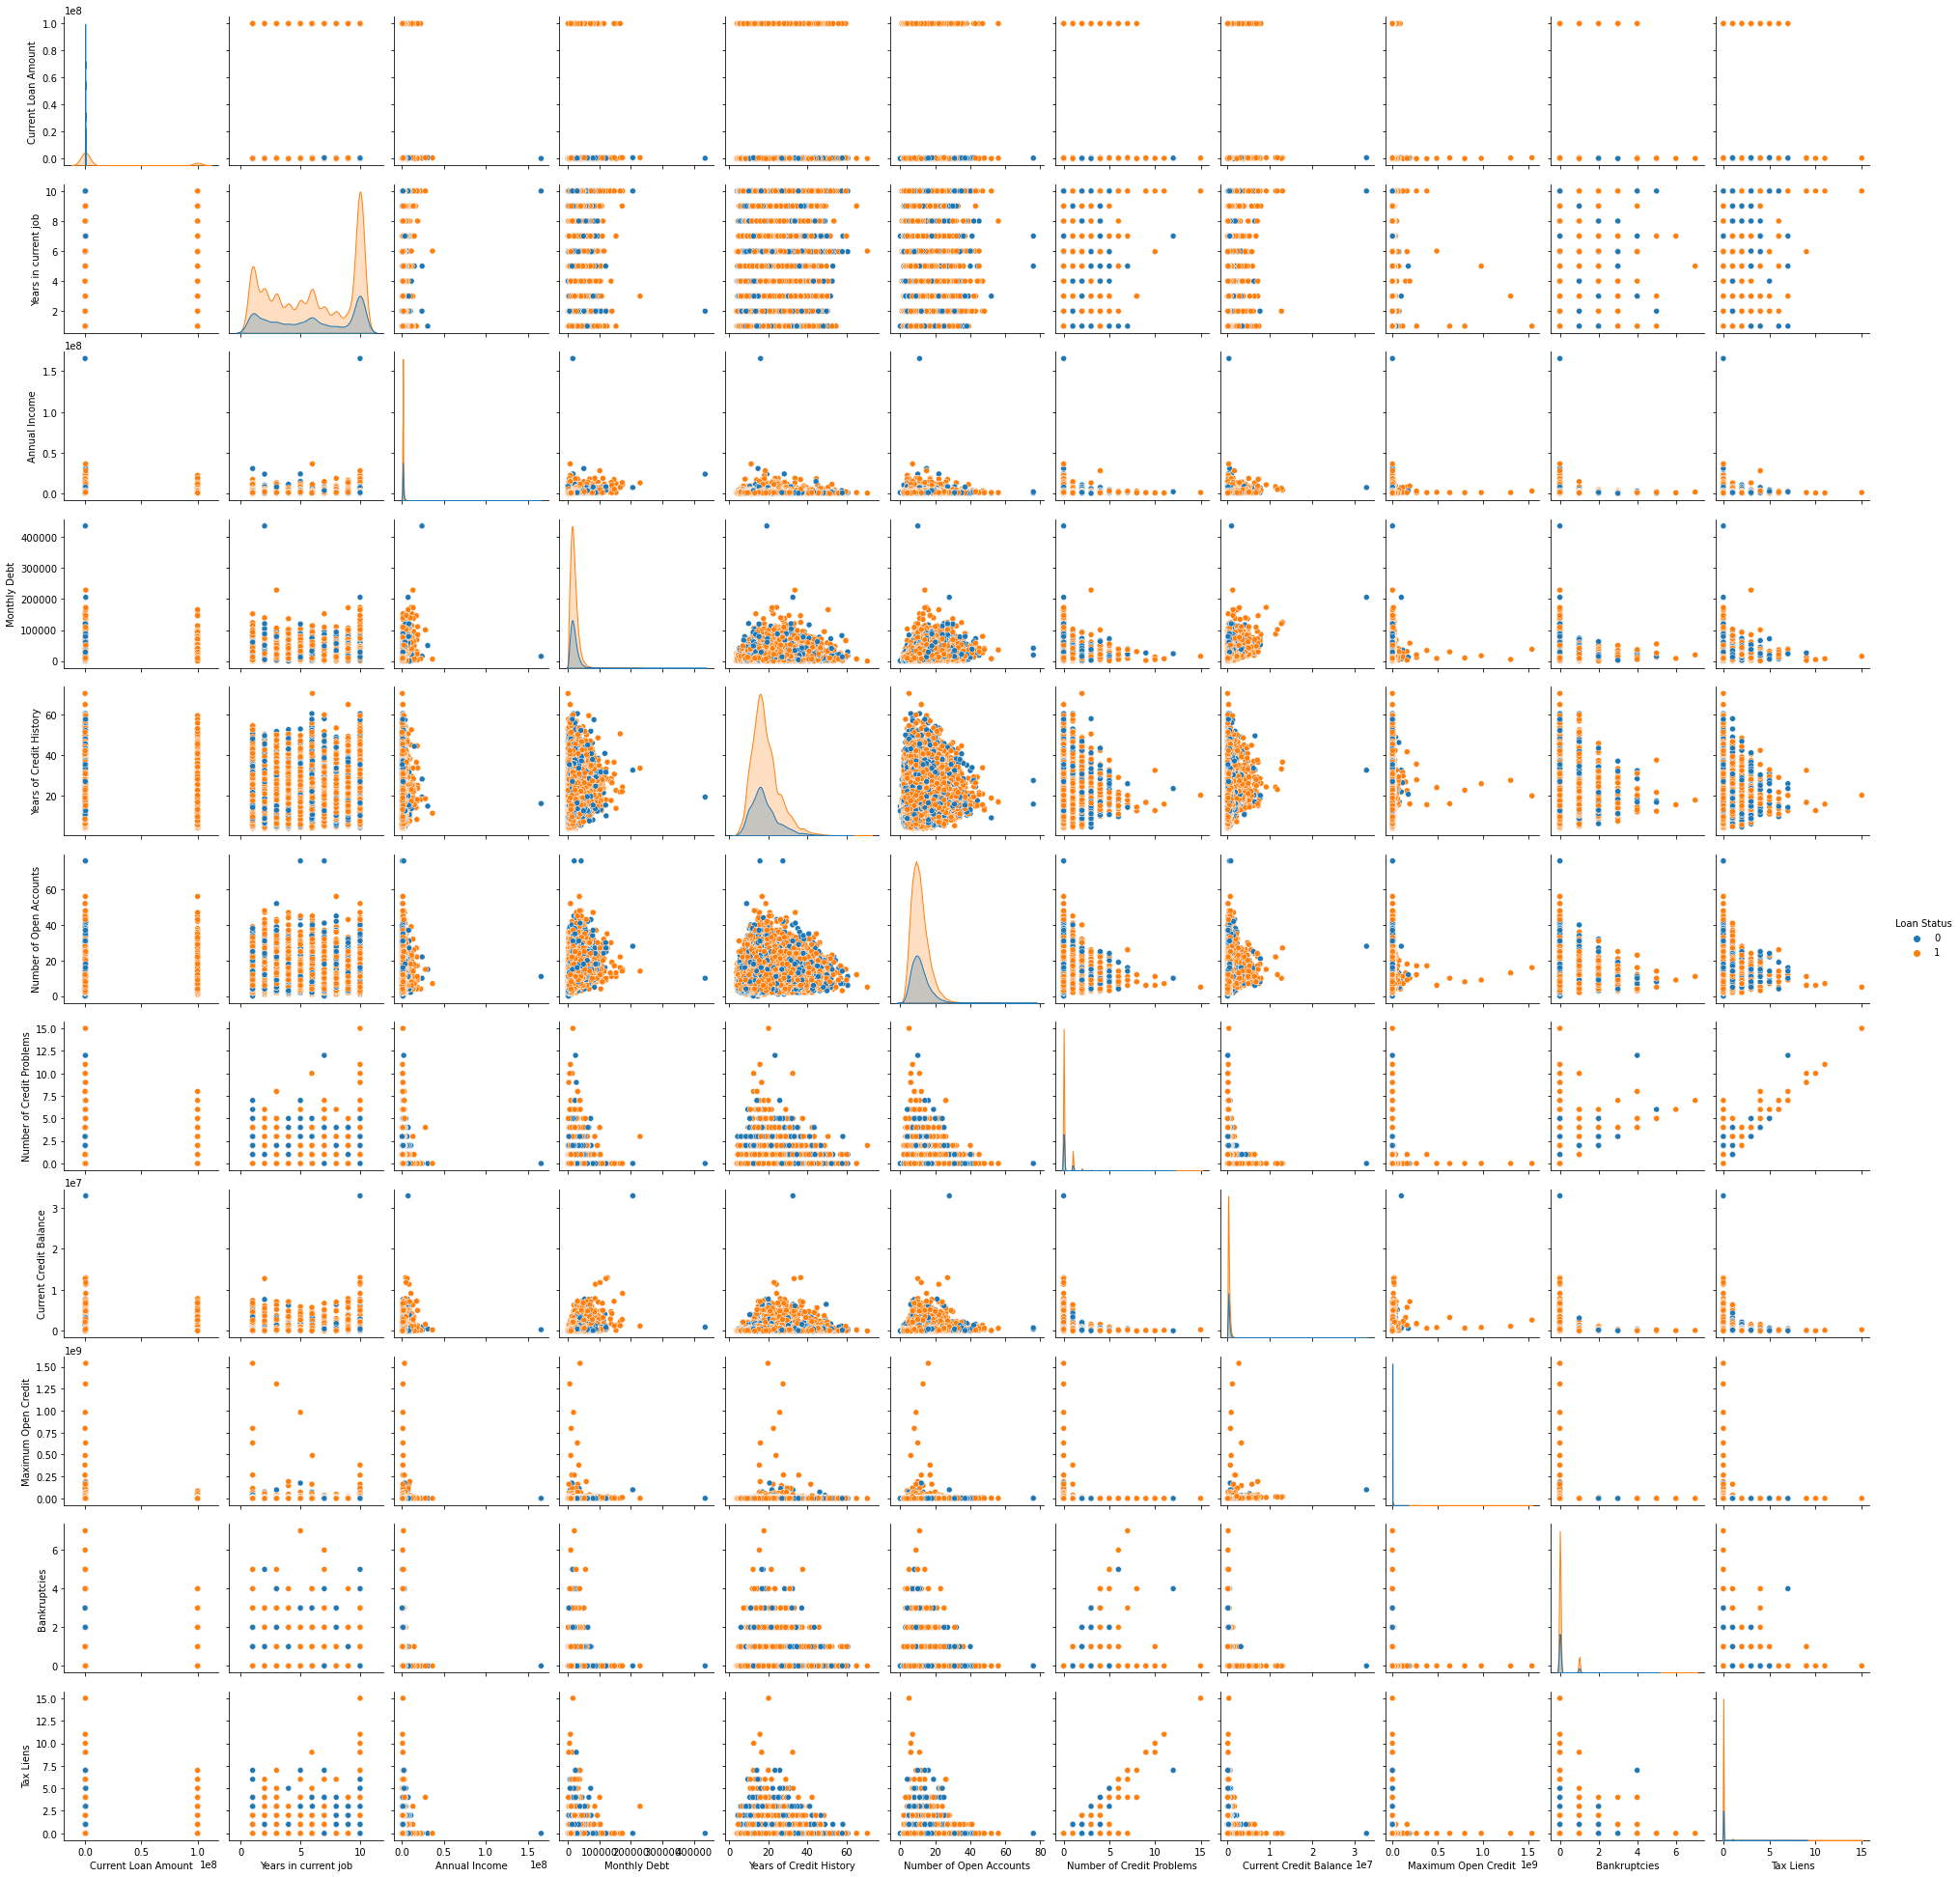

In [19]:
sns.pairplot(X,hue='Loan Status')

# **Looking for Outlier**


<AxesSubplot:xlabel='Loan Status', ylabel='Credit Score'>

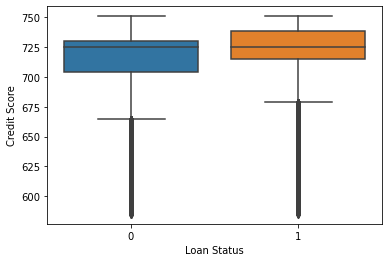

In [20]:
sns.boxplot(x='Loan Status', y='Credit Score', data=df)

<AxesSubplot:xlabel='Loan Status', ylabel='Current Loan Amount'>

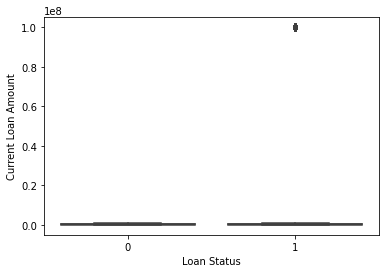

In [21]:
sns.boxplot(x='Loan Status', y='Current Loan Amount', data=df)

<AxesSubplot:xlabel='Loan Status', ylabel='Annual Income'>

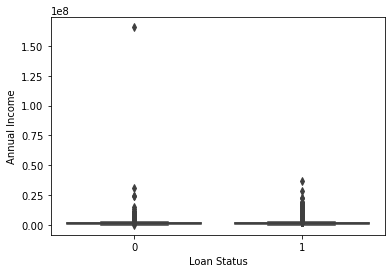

In [22]:
sns.boxplot(x='Loan Status', y='Annual Income',data=df)

<AxesSubplot:xlabel='Loan Status', ylabel='Current Credit Balance'>

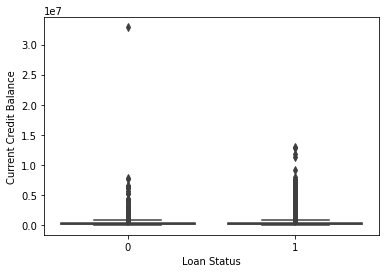

In [23]:
sns.boxplot(x='Loan Status', y='Current Credit Balance', data=df)

<AxesSubplot:xlabel='Loan Status', ylabel='Maximum Open Credit'>

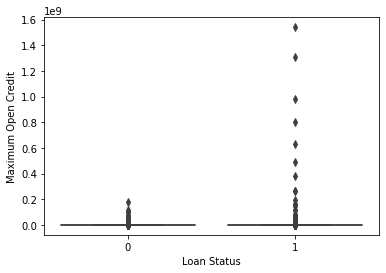

In [24]:
sns.boxplot(x='Loan Status', y='Maximum Open Credit', data=df)

Maximum open credit have alot of outlier

<AxesSubplot:xlabel='Loan Status', ylabel='Monthly Debt'>

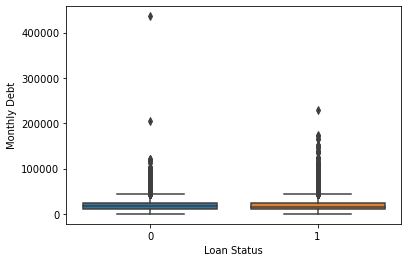

In [25]:
sns.boxplot(x='Loan Status', y='Monthly Debt', data=df)

<AxesSubplot:xlabel='Loan Status', ylabel='Number of Open Accounts'>

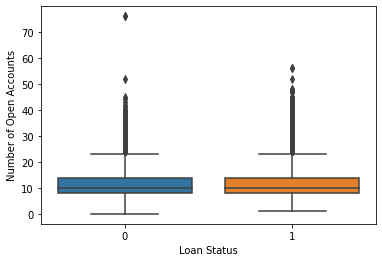

In [26]:
sns.boxplot(x='Loan Status', y='Number of Open Accounts', data=df)

<AxesSubplot:xlabel='Loan Status', ylabel='Years of Credit History'>

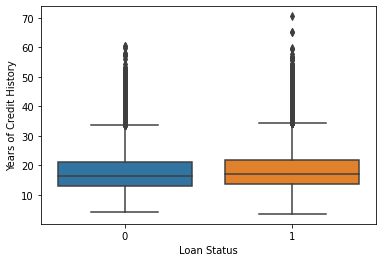

In [27]:
sns.boxplot(x='Loan Status', y='Years of Credit History', data=df)

# Looking for correlation in features

In [28]:
# Only Numerical features
df_corr = df[['Current Loan Amount','Years in current job','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Months since last delinquent','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']]

In [29]:
df_corr.corr()

,Current Loan Amount,Years in current job,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.000523,0.087623,0.014251,-0.005019,0.017628,0.006083,0.001828,-0.000267,0.004524,-0.001957,0.001828,-0.001144
Years in current job,-0.000523,1.000000,-0.015610,0.067544,0.128514,0.216443,0.003607,0.052531,0.039572,0.097033,0.001375,0.039054,0.014821
Credit Score,0.087623,-0.015610,1.000000,0.002463,-0.079968,0.072409,0.017264,-0.026802,-0.045068,-0.011916,0.013522,-0.032273,-0.020873
Annual Income,0.014251,0.067544,0.002463,1.000000,0.420917,0.138375,-0.033730,0.126624,-0.015000,0.270749,0.034571,-0.041831,0.035878
Monthly Debt,-0.005019,0.128514,-0.079968,0.420917,1.000000,0.196123,-0.033113,0.409940,-0.054212,0.477464,0.036637,-0.078494,0.021364
Years of Credit History,0.017628,0.216443,0.072409,0.138375,0.196123,1.000000,-0.015457,0.130672,0.062091,0.209311,0.030778,0.066078,0.018648
Months since last delinquent,0.006083,0.003607,0.017264,-0.033730,-0.033113,-0.015457,1.000000,-0.016285,0.079771,-0.024714,-0.004752,0.085048,0.012407
Number of Open Accounts,0.001828,0.052531,-0.026802,0.126624,0.409940,0.130672,-0.016285,1.000000,-0.015035,0.228274,0.030043,-0.025107,0.006538
Number of Credit Problems,-0.000267,0.039572,-0.045068,-0.015000,-0.054212,0.062091,0.079771,-0.015035,1.000000,-0.111790,-0.012065,0.753077,0.581318
Current Credit Balance,0.004524,0.097033,-0.011916,0.270749,0.477464,0.209311,-0.024714,0.228274,-0.111790,1.000000,0.131891,-0.122026,-0.014916


1. Correlations values are lies between 0 to 1.
2. IF the correlation value is nearest to 1 that means features are highly correlated/ or that feature have more impact on dependent variable.
3.  If the correlation value is nearest to 0 that means features are not correlated/ or that feature don't have more impact on dependent variable.

In [30]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: x/10 if x>900 else x)

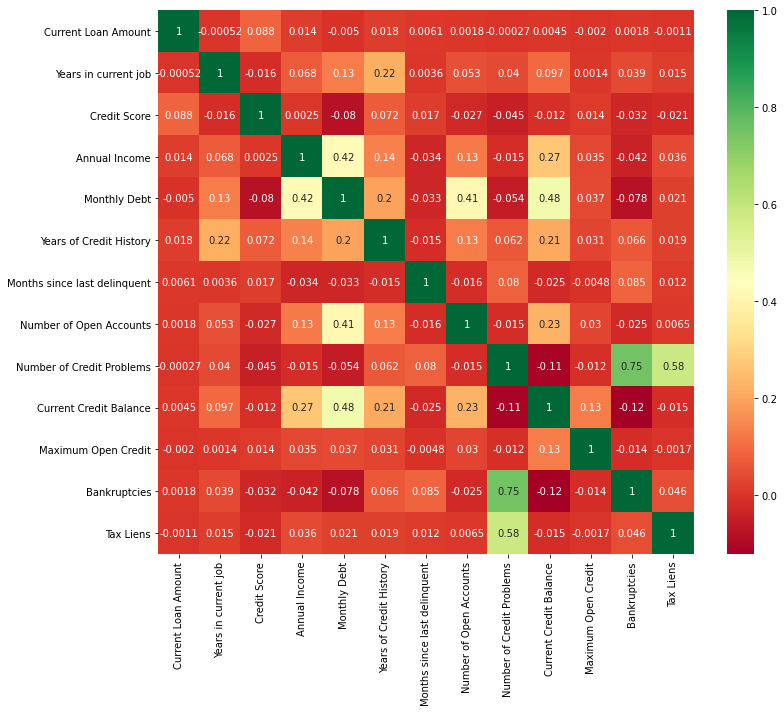

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), annot=True, cmap='RdYlGn')
plt.show()

1. Green color box value is highly correlated
2. Red color box value is slightly/little bit correlated

# Calculating vif to remove multicollinearity

In [32]:
df1 = df[['Current Loan Amount','Years in current job','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']]

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(df1.values,i) for i in range (df1.shape[1])]
for i in range(0,11):
    print("The Vif for {} is {}".format(df1.columns[i],vif[i]))

The Vif for Current Loan Amount is 1.1570161204960374
The Vif for Years in current job is 4.256216392149607
The Vif for Credit Score is 13.565333719347345
The Vif for Annual Income is 3.6719707411030753
The Vif for Monthly Debt is 5.584234066127597
The Vif for Years of Credit History is 8.692978098257074
The Vif for Number of Open Accounts is 7.193271210909448
The Vif for Number of Credit Problems is 8.391184161562522
The Vif for Current Credit Balance is 2.2250039149365213
The Vif for Maximum Open Credit is 1.0269430784938711
The Vif for Bankruptcies is 5.516613623095624


# Converting Categorical features into numerical features

In [34]:
One_hot = pd.get_dummies(df[['Term','Home Ownership', 'Purpose']],drop_first=True)
One_hot.head()

,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0


In [35]:
X = df[['Current Loan Amount','Annual Income','Monthly Debt','Years of Credit History','Current Credit Balance','Maximum Open Credit','Tax Liens','Bankruptcies','Number of Credit Problems','Number of Open Accounts']]

In [36]:
df_final_feature = pd.concat([One_hot,X],axis=1)

In [37]:
pd.set_option('display.max_columns',None)
df_final_feature.head()

,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Current Loan Amount,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit,Tax Liens,Bankruptcies,Number of Credit Problems,Number of Open Accounts
0,1,0,0,0,0,0,1,0,0,0,445412,1.167493e+06,5214.74,17.2,228190,416746.0,0.0,1.0,1,6
1,1,0,0,0,0,1,0,0,0,0,262328,1.375894e+06,33295.98,21.1,229976,850784.0,0.0,0.0,0,35
2,1,1,0,0,0,1,0,0,0,0,99999999,2.231892e+06,29200.53,14.9,297996,750090.0,0.0,0.0,1,18
3,0,1,0,0,0,1,0,0,0,0,347666,8.069490e+05,8741.90,12.0,256329,386958.0,0.0,0.0,0,9
4,1,0,1,0,0,1,0,0,0,0,176220,1.375894e+06,20639.70,6.1,253460,427174.0,0.0,0.0,0,15


In [38]:
df_final_feature.shape

(89785, 20)

In [39]:
y = df['Loan Status']

In [40]:
y.value_counts()

1    67146
0    22639
Name: Loan Status, dtype: int64

# splitting the data

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( 
    df_final_feature,y,test_size=0.1,stratify=df['Loan Status'])

# Handling Imbalance Datasets

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [43]:
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [44]:
test = pd.concat([X_test,y_test],axis=1)
test.to_csv("bank_loan_test_data.csv",index=False)

# oversampling the training data for various upsampling ratio and saving in seperate file

In [45]:
os = SMOTE(sampling_strategy=0.8,random_state=42)
X_train_res, y_train_res = os.fit_resample(X_train,y_train)
X_train_res.shape, y_train_res.shape

((108775, 20), (108775,))

In [46]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1: 60431, 0: 20375})
Resampled dataset shape Counter({1: 60431, 0: 48344})


In [47]:
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)
train_80 = pd.concat([X_train_res, y_train_res],axis=1)

In [48]:
train_80.to_csv('bank_loan_train_data_80.csv',index=False)

# oversampling ratio 0.9

In [49]:
os = SMOTE(sampling_strategy=0.9,random_state=42)
X_train_res1,y_train_res1 = os.fit_resample(X_train,y_train)

In [50]:
X_train_res1 = pd.DataFrame(X_train_res1)
y_train_res1 = pd.DataFrame(y_train_res1)
train_90 = pd.concat([X_train_res1,y_train_res1],axis=1)
train_90.to_csv('bank_loan_train_data_90.csv',index=False)

# oversampling ratio 1

In [51]:
os = SMOTE(sampling_strategy=1,random_state=42)
X_train_res2,y_train_res2 = os.fit_resample(X_train,y_train)

In [52]:
X_train_res2 = pd.DataFrame(X_train_res2)
y_train_res2 = pd.DataFrame(y_train_res2)
train_100 = pd.concat([X_train_res2,y_train_res2],axis=1)
train_100.to_csv('bank_loan_train_data_100.csv',index=False)

# Loading training and testing dataset

In [53]:
df_train_80 = pd.read_csv("bank_loan_train_data_80.csv")
df_train_90 = pd.read_csv("bank_loan_train_data_90.csv")
df_train_100 = pd.read_csv("bank_loan_train_data_100.csv")
df_test = pd.read_csv("bank_loan_test_data.csv")

# Logistic Regression

# for upsampling ratio of 0.8

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr_80 = LogisticRegression()
lr_80.fit(df_train_80.drop('Loan Status',axis=1),df_train_80['Loan Status'])

LogisticRegression()

In [55]:
print("The accuracy of Logistic Regression model with sampling ratio 0.8 is {}".format(lr_80.score(df_test.drop(['Loan Status'],axis=1),df_test['Loan Status'])))

The accuracy of Logistic Regression model with sampling ratio 0.8 is 0.6528566655529568


<AxesSubplot:>

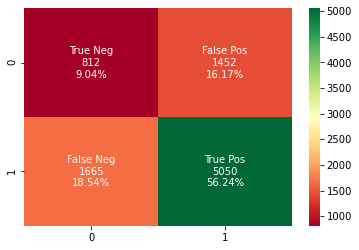

In [56]:
y_pred = lr_80.predict(df_test.drop('Loan Status',axis=1))
cn_matrix = confusion_matrix(df_test['Loan Status'],y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

# for upsampling ratio of 0.9

In [57]:
lr_90 = LogisticRegression()
lr_90.fit(df_train_90.drop('Loan Status',axis=1),df_train_90['Loan Status'])

LogisticRegression()

In [58]:
print("The accuracy of logistic regression model with upsampling ratio 0.9 is {}".format(lr_90.score(df_test.drop('Loan Status',axis=1),df_test['Loan Status'])))

The accuracy of logistic regression model with upsampling ratio 0.9 is 0.570664884731039


<AxesSubplot:>

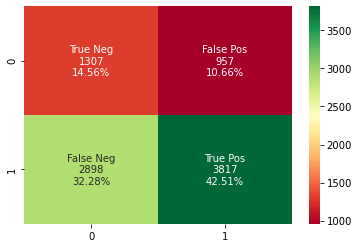

In [59]:
y_pred = lr_90.predict(df_test.drop('Loan Status',axis=1))
cn_matrix = confusion_matrix(df_test['Loan Status'],y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

# for upsampling ratio of 1.0

In [60]:
lr_100 = LogisticRegression()
lr_100.fit(df_train_100.drop('Loan Status',axis=1),df_train_100['Loan Status'])

LogisticRegression()

In [61]:
print("The accuracy of Logistic Regression model with smapling ratio 1 is {}".format(lr_100.score(df_test.drop('Loan Status',axis=1),df_test['Loan Status'])))

The accuracy of Logistic Regression model with smapling ratio 1 is 0.5061810892081523


<AxesSubplot:>

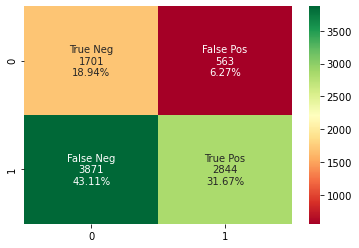

In [62]:
y_pred = lr_100.predict(df_test.drop('Loan Status',axis=1))
cn_matrix = confusion_matrix(df_test['Loan Status'],y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

# K Nearest Neighbors

for upsampling ratio of 0.8

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_80 = KNeighborsClassifier(algorithm='kd_tree')
knn_80.fit(df_train_80.drop('Loan Status',axis=1),df_train_80['Loan Status'])

KNeighborsClassifier(algorithm='kd_tree')

In [64]:
print("The accuracy of KNN model with upsampling ratio 0.8 is {}".format(knn_80.score(df_test.drop('Loan Status',axis=1),df_test['Loan Status'])))

The accuracy of KNN model with upsampling ratio 0.8 is 0.5975052901213944


<AxesSubplot:>

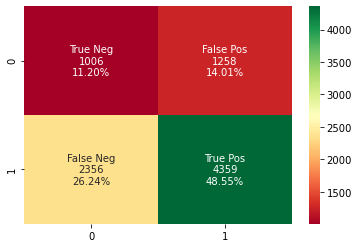

In [65]:
y_pred = knn_80.predict(df_test.drop('Loan Status',axis=1))
cn_matrix = confusion_matrix(df_test['Loan Status'],y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

for upsampling ratio of 0.9

In [66]:
knn_90 = KNeighborsClassifier(algorithm='kd_tree')
knn_90.fit(df_train_90.drop('Loan Status',axis=1),df_train_90['Loan Status'])

KNeighborsClassifier(algorithm='kd_tree')

In [67]:
print("The accuracy of KNN model with upsampling ratio 0.9 is {}".format(knn_90.score(df_test.drop('Loan Status',axis=1),df_test['Loan Status'])))

The accuracy of KNN model with upsampling ratio 0.9 is 0.5923822251921149


<AxesSubplot:>

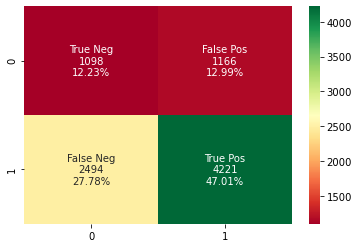

In [68]:
y_pred = knn_90.predict(df_test.drop('Loan Status',axis=1))
cn_matrix = confusion_matrix(df_test['Loan Status'],y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_100 = KNeighborsClassifier(algorithm='kd_tree')
knn_100.fit(df_train_100.drop('Loan Status',axis=1),df_train_100['Loan Status'])

KNeighborsClassifier(algorithm='kd_tree')

In [70]:
print("The accuracy of KNN model with upsampling ratio 1 is  {}".format(knn_100.score(df_test.drop('Loan Status',axis=1),df_test['Loan Status'])))

The accuracy of KNN model with upsampling ratio 1 is  0.5794631918921929


<AxesSubplot:>

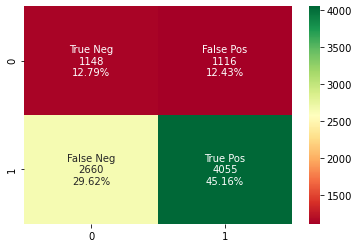

In [71]:
y_pred = knn_100.predict(df_test.drop('Loan Status',axis=1))
cn_matrix = confusion_matrix(df_test['Loan Status'],y_pred)
group_names = ['True Neg', 'False Pos','False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix,annot=labels,fmt="",cmap='RdYlGn')

# Random Forest Classifier

# for upsampling ratio of 0.8

In [72]:
from sklearn.ensemble import RandomForestClassifier
rb_80 = RandomForestClassifier()
rb_80.fit(df_train_80.drop('Loan Status',axis=1),df_train_80['Loan Status'])

RandomForestClassifier()

In [73]:
print("The accuracy of Random Forest model with upsampling ratio 0.8 is {}".format(rb_80.score(df_test.drop('Loan Status',axis=1),df_test['Loan Status'])))

The accuracy of Random Forest model with upsampling ratio 0.8 is 0.7161153803318855


<AxesSubplot:>

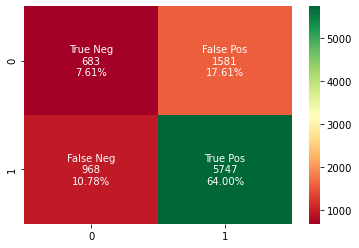

In [74]:
y_pred = rb_80.predict(df_test.drop('Loan Status',axis=1))
cn_matrix = confusion_matrix(df_test['Loan Status'],y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

# for upsampling ratio of 0.9

In [75]:
rb_90 = RandomForestClassifier()
rb_90.fit(df_train_90.drop('Loan Status',axis=1),df_train_90['Loan Status'])

RandomForestClassifier()

In [76]:
print("The accuracy of Random Forest model with upsampling ratio 0.9 is {}".format(rb_90.score(df_test.drop('Loan Status',axis=1),df_test['Loan Status'])))

The accuracy of Random Forest model with upsampling ratio 0.9 is 0.7073170731707317


<AxesSubplot:>

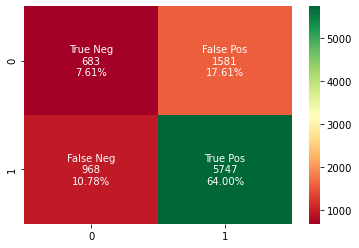

In [77]:
y_pred = rb_80.predict(df_test.drop('Loan Status',axis=1))
cn_matrix = confusion_matrix(df_test['Loan Status'],y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

# for upsampling ratio of 1.0

In [78]:
rb_100 = RandomForestClassifier(n_estimators=30)
rb_100.fit(df_train_100.drop('Loan Status',axis=1),df_train_100['Loan Status'])

RandomForestClassifier(n_estimators=30)

In [79]:
print("The accuracy of Random Forest model with upsampling ratio 1.0 is {}".format(rb_100.score(df_test.drop('Loan Status',axis=1),df_test['Loan Status'])))

The accuracy of Random Forest model with upsampling ratio 1.0 is 0.6928388461966811


<AxesSubplot:>

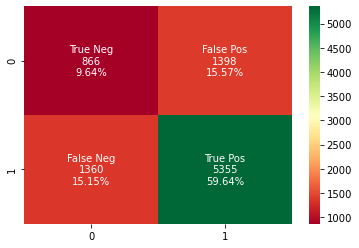

In [80]:
y_pred = rb_100.predict(df_test.drop('Loan Status',axis=1))
cn_matrix = confusion_matrix(df_test['Loan Status'],y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

# Support Vector Machine


for upsampling ratio of 1.0

In [92]:
from sklearn.svm import LinearSVC
svm = LinearSVC(tol=1e-5,max_iter=10000)
svm.fit(df_train_100.drop('Loan Status',axis=1),df_train_100['Loan Status'])

LinearSVC(max_iter=10000, tol=1e-05)

In [93]:
print("The accuracy of SVM model with upsampling ratio 1.0 is {}".format(svm.score(df_test.drop('Loan Status',axis=1),df_test['Loan Status'])))

The accuracy of SVM model with upsampling ratio 1.0 is 0.4511638267067602


<AxesSubplot:>

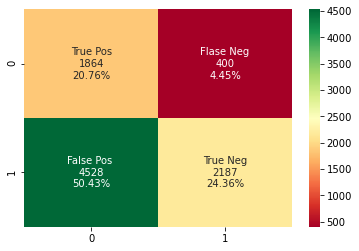

In [94]:
y_pred = svm.predict(df_test.drop('Loan Status',axis=1))
cn_matrix = confusion_matrix(df_test['Loan Status'],y_pred)
group_names = ['True Pos','Flase Neg','False Pos ','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in cn_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix,annot=labels, fmt='',cmap="RdYlGn")